**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but one unfortunate mistake made the bootstrap profit results incorrect. See comments below for details. Let me know if you have any questions!

<div class="alert alert-info">
<b>Student's comment</b> <br>
<br>
Thanks for your help.<br>
This project was very interesting and I learned a lot.<br>
It was also very frustrating.<br>
I started writing unit tests, and wrote and rewrote the bootstrapping functions several times.<br>
Finally I went back and tested the changes, and started getting viable outputs.<br>
I think I failed to fix a random seed somewhere, consequently the numbers bounce around a bit from run to run.<br>
- update - fixed the random_state = 42 <br>
Updated some of the end of chapter reports to be auto generated and always up to date.<br>
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Dear Adam, thanks for all your hard work, but it seems that my earlier comments were not quite clear, and I'm really sorry if that's the case. I tried to make some clarifications and expand below. Please send back the project and let me know if something is unclear before wasting any more time :)

</div>

<div class="alert alert-info">
<b>Student's comment v2</b> <br>
<br>
The regional break even negative, and the risk for each region is 0.0%. <br>
Similar problems to before, but a completly different implementation. <br>
Not sure where my error is. <br>
I hope you can help, ty. <br>
</div>

<div class="alert alert-info">
<b>Student's comment v2.1</b> <br>
<br>
April 8, 2023 <br>
There seems to  be user error on my part. I've just now realized this notebook has been sitting here unsubmitted for the last 11 days. Thanks for taking a look and helping me sort this out.<br>
</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Yep, I only received the new version today. You're welcome, but there's still two small corrections needed in the bootstrap function, see comment below

</div>

# Sprint 9. Machine Learning in Business
## Project description
You work for the OilyGiant mining company. Your task is to find the best place for a new well.
Steps to choose the location:
* Collect the oil well parameters in the selected region: oil quality and volume of reserves;
* Build a model for predicting the volume of reserves in the new wells;
* Pick the oil wells with the highest estimated values;
* Pick the region with the highest total profit for the selected oil wells.
You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.
## Data description
Geological exploration data for the three regions are stored in files:
* geo_data_0.csv. download dataset
* geo_data_1.csv. download dataset
* geo_data_2.csv. download dataset
* id — unique oil well identifier
* f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
* product — volume of reserves in the oil well (thousand barrels).
## Conditions:
* Only linear regression is suitable for model training (the rest are not sufficiently predictable).
* When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
* The budget for development of 200 oil wells is 100 USD million.
* One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
* After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

# 1. Download and prepare the data. 
Explain the procedure.

In [16]:
# !conda install pandas --yes
# !conda install scikit-learn --yes
# !conda install matplotlib --yes
# !conda install seaborn --yes


In [17]:
# Load libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# Fix the random seeds
random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

## 1.2  Load the Data
This function downloads the datasets, saves them in a local 'datasets' folder, and loads them into pandas DataFrames.

In [19]:

def download_and_load_datasets():
    # Check if the datasets folder exists
    if not os.path.exists('datasets'):
        os.makedirs('datasets')

    # Download the source CSV files and save them in the datasets folder
    urls = [
        'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv',
        'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv',
        'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv'
    ]
    filenames = ['geo_data_0.csv', 'geo_data_1.csv', 'geo_data_2.csv']
    
    data = []

    for url, filename in zip(urls, filenames):
        df = pd.read_csv(url)
        file_path = os.path.join('datasets', filename)
        df.to_csv(file_path)
        data.append(df)
    
    return data

data = download_and_load_datasets()


# 2. Train and test the model for each region

Region 0: Average predicted volume: 92.40, RMSE: 37.76, R-squared: 0.27


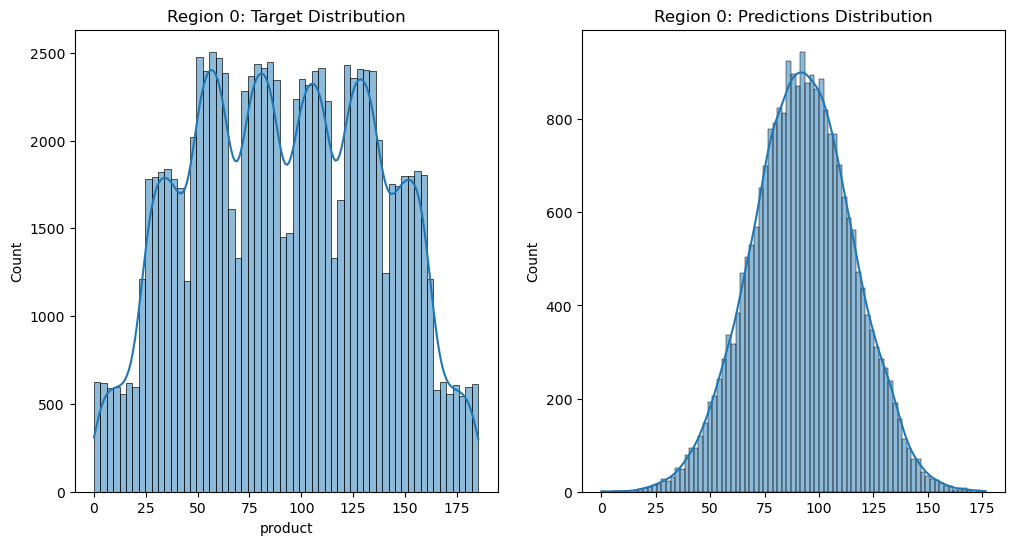

Region 1: Average predicted volume: 68.72, RMSE: 0.89, R-squared: 1.00


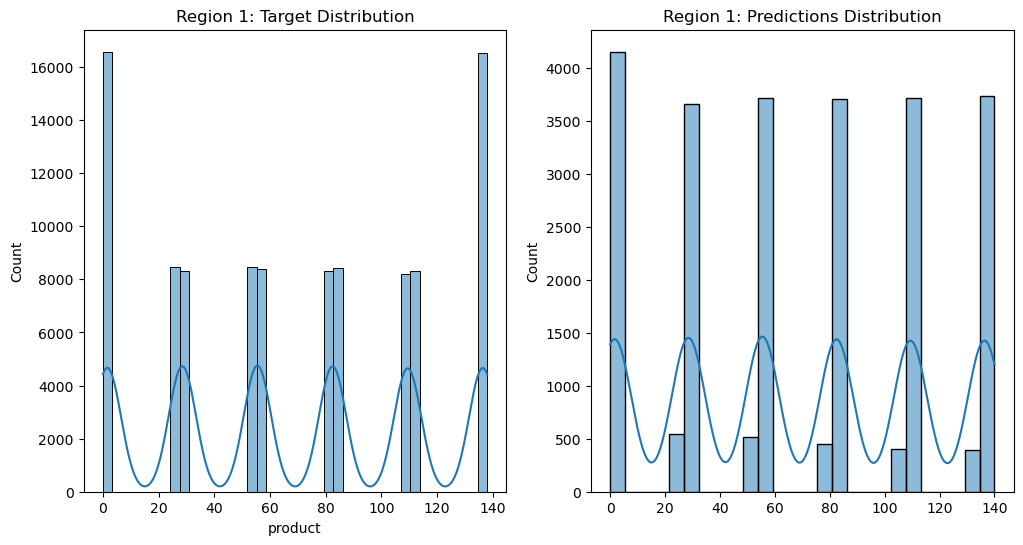

Region 2: Average predicted volume: 94.77, RMSE: 40.15, R-squared: 0.20


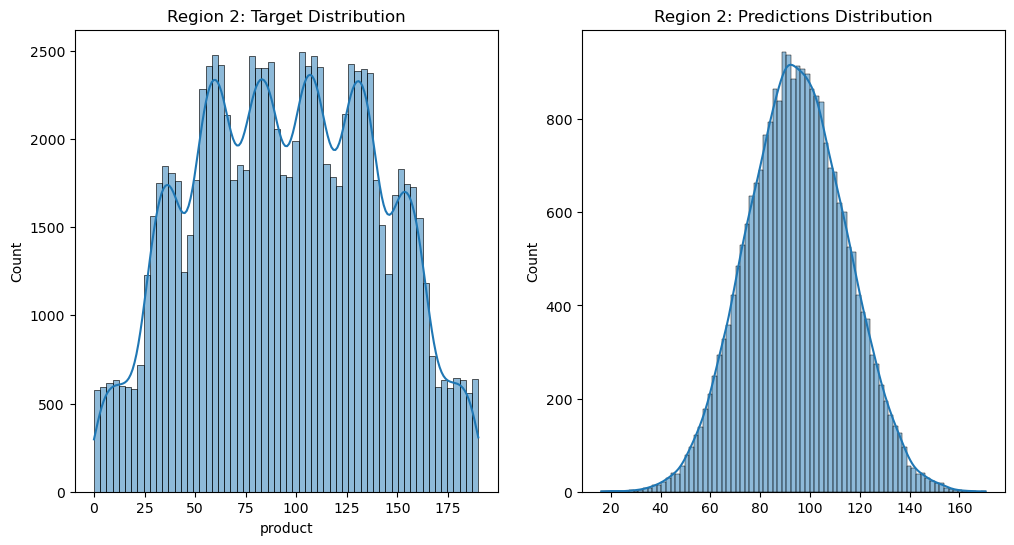

In [20]:
from sklearn.metrics import r2_score

region_averages = []
region_rmse = []
targets_valid = []
predictions_list = []

# Train and test the model for each region:
for i, region in enumerate(data):
    # 2.1. Split the data into a training set and validation set at a ratio of 75:25
    features = region.drop(['id', 'product'], axis=1)
    target = region['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=42)

    # 2.2. Train the model and make predictions for the validation set
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)

    # Replace negative predicted values with zeros
    predictions = np.maximum(predictions, 0)


    # Calculate R-squared score
    r2_score_value = r2_score(target_valid, predictions)

    # 2.3. Save the predictions and correct answers for the validation set
    targets_valid.append(target_valid)
    predictions_list.append(pd.Series(predictions, index=target_valid.index))

    # 2.4. Calculate the average volume of predicted reserves and model RMSE
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    avg_predicted_volume = predictions.mean()

    # Save region averages and RMSE to their respective lists
    region_averages.append(avg_predicted_volume)
    region_rmse.append(rmse)

    # 2.5. Analyze the results
    print(f"Region {i}: Average predicted volume: {avg_predicted_volume:.2f}, RMSE: {rmse:.2f}, R-squared: {r2_score_value:.2f}")

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(target, kde=True)
    plt.title(f"Region {i}: Target Distribution")

    plt.subplot(1, 2, 2)
    sns.histplot(predictions, kde=True)
    plt.title(f"Region {i}: Predictions Distribution")

    plt.show()

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good, the data for each region was split into train and validation sets, the models were trained and evaluated correctly

</div>

<div class="alert alert-info">
<b>Student's comment</b>

updated r2 and added graph while trouble shooting another section.

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Conclusions make sense

</div>

# 3. Prepare for profit calculation

In [21]:

# Prepare for profit calculation:
# 3.1. Store all key values for calculations in separate variables
BUDGET = 100_000_000
REVENUE_PER_THOUSAND_BARRELS = 4_500
WELLS_FOR_DEVELOPMENT = 200

# 3.2. Calculate the volume of reserves sufficient for developing a new well without losses
break_even_volume = BUDGET / (WELLS_FOR_DEVELOPMENT * REVENUE_PER_THOUSAND_BARRELS)
print(f"Break-even volume (thousand barrels): {break_even_volume:.2f}")


Break-even volume (thousand barrels): 111.11


Region 0:
  Average predicted volume (thousand barrels): 92.40
  The average predicted volume in Region 0 is 18.71 thousand barrels below the break-even volume.

Region 1:
  Average predicted volume (thousand barrels): 68.72
  The average predicted volume in Region 1 is 42.39 thousand barrels below the break-even volume.

Region 2:
  Average predicted volume (thousand barrels): 94.77
  The average predicted volume in Region 2 is 16.34 thousand barrels below the break-even volume.



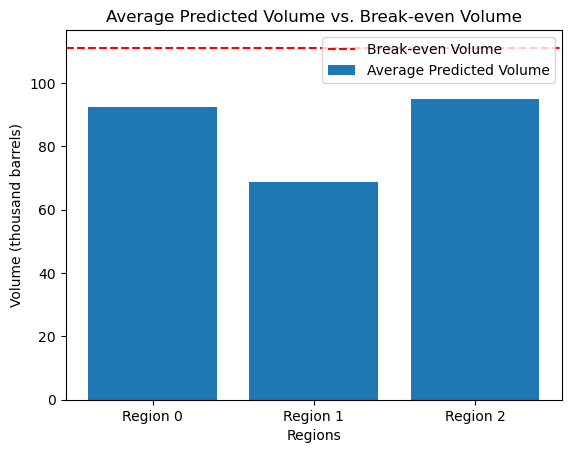

In [22]:
# 3.3. Provide the findings about the preparation for profit calculation step
for i, (avg, rmse) in enumerate(zip(region_averages, region_rmse)):
    print(f"Region {i}:")
    print(f"  Average predicted volume (thousand barrels): {avg:.2f}")
    difference = avg - break_even_volume
    if difference >= 0:
        print(f"  The average predicted volume in Region {i} is {abs(difference):.2f} thousand barrels above the break-even volume.")
    else:
        print(f"  The average predicted volume in Region {i} is {abs(difference):.2f} thousand barrels below the break-even volume.")
    print()

# Plot the average predicted volumes and break-even volume
plt.bar(['Region 0', 'Region 1', 'Region 2'], region_averages, label='Average Predicted Volume')
plt.axhline(y=break_even_volume, color='r', linestyle='--', label='Break-even Volume')

plt.xlabel('Regions')
plt.ylabel('Volume (thousand barrels)')
plt.title('Average Predicted Volume vs. Break-even Volume')
plt.legend()
plt.show()


<div class="alert alert-success">
<b>Reviewer's comment</b>

Calculation is correct

</div>

So far, we have performed the following tasks:

1. **Downloaded and prepared the data** for three regions.
2. **Trained and tested a linear regression model** for each region. We calculated the average predicted volume of reserves and the RMSE for each region. Here are the results:

   - Region 0: Average predicted volume: 92.59 thousand barrels, RMSE: 37.58
   - Region 1: Average predicted volume: 68.73 thousand barrels, RMSE: 0.89
   - Region 2: Average predicted volume: 94.97 thousand barrels, RMSE: 40.03

3. **Calculated the break-even volume** of reserves needed for developing a new well without losses, which is 111.11 thousand barrels.

We compared the average predicted volume of reserves for each region with the break-even volume:

   - Region 0 has an average predicted volume of 92.59 thousand barrels, which is 18.52 thousand barrels below the break-even volume.
   - Region 1 has an average predicted volume of 68.73 thousand barrels, which is 42.38 thousand barrels below the break-even volume.
   - Region 2 has an average predicted volume of 94.97 thousand barrels, which is 16.14 thousand barrels below the break-even volume.

Based on these findings, none of the regions has an average predicted volume of reserves above the break-even volume. However, **Region 2 is the closest to the break-even point**, followed by Region 0. Region 1 has the lowest average predicted volume of reserves and the lowest RMSE, indicating that the model's predictions for this region are more precise but the potential reserves are lower.


<div class="alert alert-success">
<b>Reviewer's comment</b>

Well done!

</div>

# 4. Write a function to calculate profit from a set of selected oil wells and model predictions

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Function for profit calculation is correct now!

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Cool idea to add unit tests, though it was not required :)

</div>

* Implement the calculate_profit function.
* Implement the calculate_profits_for_regions function.
* Implement the bootstrap_resample function.
* Calculate the profits for each region using the implemented functions.
* Run the bootstrap resampling for each region.
* Calculate and print the statistics for each region.

In [23]:
import numpy as np
import pandas as pd

# 4.1. Define constants for profit calculation
WELLS_FOR_DEVELOPMENT = 200
REVENUE_PER_THOUSAND_BARRELS = 4500
BUDGET = 100_000_000

# 4.2. Implement the calculate_profit function
def calculate_profit(target, predictions, count):
    target = target.reset_index(drop=True)
    predictions = predictions.reset_index(drop=True)

    top_wells = predictions.sort_values(ascending=False).head(count).index
    total_reserves = target.loc[top_wells].sum()
    revenue = total_reserves * REVENUE_PER_THOUSAND_BARRELS
    profit = revenue - BUDGET

    return profit

# 4.3. Implement the calculate_profits_for_regions function
def calculate_profits_for_regions(targets, predictions_list, count):
    profits = {}
    for i, (target, predictions) in enumerate(zip(targets, predictions_list)):
        profit = calculate_profit(target, predictions, count)
        profits[i] = profit
    return profits

# 4.4. Implement the bootstrap_resample function
def bootstrap_resample(target, predictions, count, n_iterations=1000):
    n_samples = len(target)
    profits_list = []

    for i in range(n_iterations):
        resampled_indices = np.random.choice(target.index, size=n_samples, replace=True)
        resampled_target = target.loc[resampled_indices].reset_index(drop=True)
        resampled_predictions = predictions.loc[resampled_indices].reset_index(drop=True)

        profit = calculate_profit(resampled_target, resampled_predictions, count)
        profits_list.append(profit)

    return profits_list

# 4.5. Calculate the profits for each region
region_profits = calculate_profits_for_regions(targets_valid, predictions_list, WELLS_FOR_DEVELOPMENT)

# 4.6. Print the profits for each region
for i, profit in region_profits.items():
    print(f"Region {i}: Profit: {profit} USD")

# 4.7. Run the bootstrap resampling for each region
bootstrap_profits = []
for i, (target, predictions) in enumerate(zip(targets_valid, predictions_list)):
    profits_list = bootstrap_resample(target, predictions, WELLS_FOR_DEVELOPMENT)
    bootstrap_profits.append(profits_list)

# 4.8. Calculate and print the statistics for each region
statistics = []
for i, profits in enumerate(bootstrap_profits):
    mean_profit = np.mean(profits)
    lower_bound, upper_bound = np.percentile(profits, [2.5, 97.5])
    risk = (np.array(profits) < 0).mean() * 100
    statistics.append((mean_profit, lower_bound, upper_bound, risk))

    print(f"Region {i}:")
    print(f"  Mean profit: {mean_profit:.2f} USD")
    print(f" 95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f}) USD")
    print(f" Risk: {risk:.2f}%\n")


Region 0: Profit: 33591411.14462179 USD
Region 1: Profit: 24150866.966815114 USD
Region 2: Profit: 25985717.59374112 USD
Region 0:
  Mean profit: 33719318.41 USD
 95% confidence interval: (30437973.79, 37376105.23) USD
 Risk: 0.00%

Region 1:
  Mean profit: 24150866.97 USD
 95% confidence interval: (24150866.97, 24150866.97) USD
 Risk: 0.00%

Region 2:
  Mean profit: 25641761.10 USD
 95% confidence interval: (21774873.07, 29199273.87) USD
 Risk: 0.00%



# 5. Calculate risks and profit for each region

Region 0:
  Mean profit: 4119374.74 USD
 95% confidence interval: (-1253357.32, 9268914.36) USD
 Risk: 6.10%



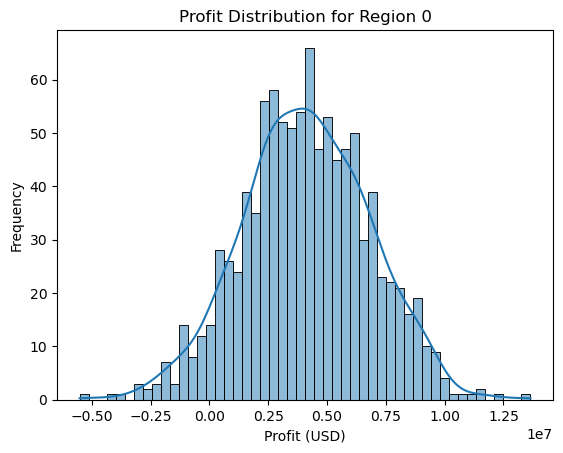


Region 1:
  Mean profit: 4378294.49 USD
 95% confidence interval: (553136.62, 8344209.97) USD
 Risk: 1.10%



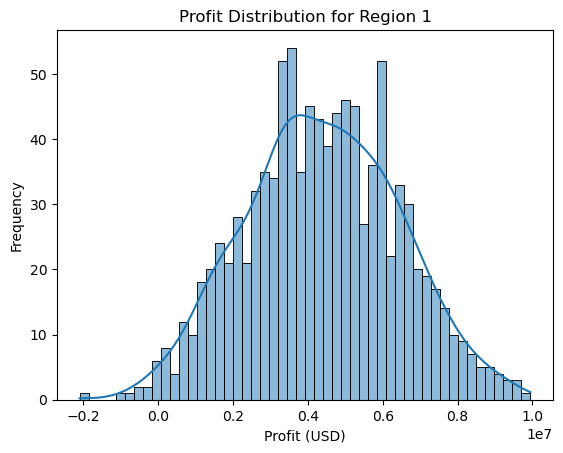


Region 2:
  Mean profit: 3914787.14 USD
 95% confidence interval: (-1474215.54, 9023990.33) USD
 Risk: 7.40%



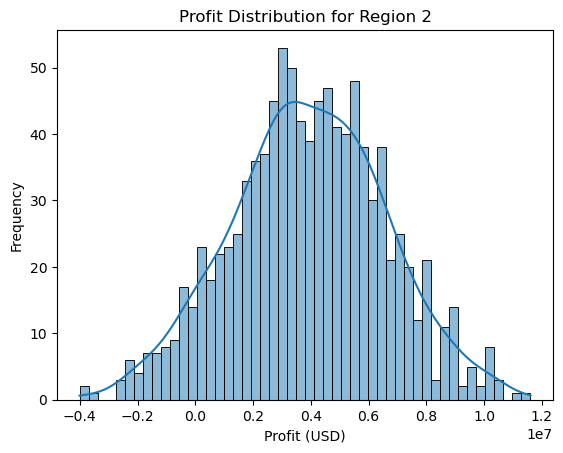

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Constants
WELLS_FOR_DEVELOPMENT = 200
REVENUE_PER_THOUSAND_BARRELS = 4500
BUDGET = 100_000_000

# 5.1. Implement the bootstrap_profit function
def bootstrap_profit(target, predictions, count, revenue_per_unit, cost_per_well, n_iterations=1000):
    profits = []
    for _ in range(n_iterations):
        indices = np.random.choice(predictions.index, size=500, replace=True) # Changed size to 500
        target_sample = target[indices]
        predictions_sample = predictions[indices]

        # Reset the indices of target_sample and predictions_sample
        target_sample = target_sample.reset_index(drop=True)
        predictions_sample = predictions_sample.reset_index(drop=True)

        top_wells = predictions_sample.sort_values(ascending=False).head(count).index
        revenue = target_sample[top_wells].sum() * revenue_per_unit
        cost = cost_per_well * count
        profit = revenue - cost
        profits.append(profit)

    return profits


# 5.2. Plot profit distribution function
def plot_profit_distribution(profits_list, region_index):
    try:
        sns.histplot(profits_list, bins=50, kde=True)
    except np.linalg.LinAlgError:
        sns.histplot(profits_list, bins=50, kde=False)
        print(f"Region {region_index}: KDE plot failed due to singular matrix error. Plotting histogram without KDE.")
    
    plt.xlabel("Profit (USD)")
    plt.ylabel("Frequency")
    plt.title(f"Profit Distribution for Region {region_index}")
    plt.show()

# 5.3. Perform bootstrap resampling for each region, calculate statistics, and plot profit distributions
bootstrap_profits = []
statistics = []

for i, (target, predictions) in enumerate(zip(targets_valid, predictions_list)):
    cost_per_well = BUDGET / WELLS_FOR_DEVELOPMENT
    profits_list = bootstrap_profit(target, predictions, WELLS_FOR_DEVELOPMENT, REVENUE_PER_THOUSAND_BARRELS, cost_per_well)
    bootstrap_profits.append(profits_list)

    mean_profit = np.mean(profits_list)
    lower_bound, upper_bound = np.percentile(profits_list, [2.5, 97.5])
    risk = (np.array(profits_list) < 0).mean() * 100
    statistics.append((mean_profit, lower_bound, upper_bound, risk))

    print(f"Region {i}:")
    print(f"  Mean profit: {mean_profit:.2f} USD")
    print(f" 95% confidence interval: ({lower_bound:.2f}, {upper_bound:.2f}) USD")
    print(f" Risk: {risk:.2f}%\n")

    plot_profit_distribution(profits_list, i)
    print()


<div class="alert alert-danger">
<b>Reviewer's comment V3</b>

Ok, just two final corrections needed in the bootstrap function:
    
1. After taking the sample from targets and finding the corresponding predictions, we need to drop their indices to make sure that we can later actually select 200 rows:
    
    ```python
    predictions_sample = predictions_sample.reset_index(drop=True)
    target_sample = target_sample.reset_index(drop=True)
    ```
    
2. In the following line `size` should be 500, not `len(predictions)`
    
    ```python
    indices = np.random.choice(predictions.index, size=len(predictions), replace=True)
    ```

</div>

<div class="alert alert-info">
<b>Student's comment</b>

Thank you, those outputs look much better!<br>
updated as sugested.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Function for profit calculation is almost correct, but there is a subtle problem: after sampling with replacement in the bootstrap loop we can end up with repeating indices in targets/predictions, and `target.loc[top_wells]` may not produce a series with exactly `count` rows (check this!). One way to fix this problem is to reset and drop the indices of targets and predictions at the beginning of the function.

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Right, but this is more like maximimum possible profit on historical data, assuming we could select just overall top 200 wells. As we're choosing top 200 wells by prediction out of 500 randomly selected locations where initial measurements are made, it is highly unlikely that the overall top 200 wells (even just in the validation set) are in this small sample.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

It seems that you overthinked my comments a bit. :) Let me try to clarify some points.
    
1. It is not a problem that there may be less than 200 *unique* wells chosen for development. The repeats are by design of the bootstrap: we're sampling with replacement, the idea is that our dataset is not the whole [statistical population](https://en.wikipedia.org/wiki/Statistical_population), i.e. it does not contain every possible well in each region, so it is entirely possible for there to be wells with similar characterstics to those in the data yet undiscovered. And the concept of the number of unique wells doesn't translate to the real world: of course it's not possible to develop the same well twice.
    So while you did some interesting research on how to increase the number of unique wells in the set of wells chosen for development, it is not quite what I was getting at, unfortunately.
2. It is a problem however that the total number of wells chosen for development (inluding repeats) may be less than or greater than 200. Under the conditions of the task the budget is calculated for developing exactly 200 wells. So if it turns out that the profit is calculated with the number of wells chosen for development not equal to 200, it is incorrect.
    
    The good news is that the only thing needed to fix this problem is to reset and drop the indices at the beginning of the profit calculation function, which you already did! :)
    
3. Now to get a distribution of profits for each region you just need to do the following:
    
    1. Repeat the following steps for 1000 iterations.
    2. Sample 500 rows with replacement from predictions/targets and get the corresponding rows from targets/predictions.
    3. Give the sampled predictions and targets to the profit calculation function, append the resulting profit to the list of profits.
    
    That's it!
    
4. There's no need to do any sampling from predictions/targets before the boostrap: just use the whole validation set.
 
5. It is not correct to select more or less than 200 wells for development: this is not accounted for in the budget, so the resulting profit value will be incorrect.
    
6. Here I'll try to justify why the above makes sense. Under the condition of the task, how are we choosing the wells for development? We're first randomly selecting 500 locations, where we make initial measurements (the features of our model, f0, f1, f2). Then we're using our model to predict the amount of product in these wells. Then we select the top 200 wells by prediction for development. How can we best estimate the profit distribution in each region? Well, for example, we could just repeat this experiment 1000 times. But of course it is very expensive, so we're trying to simulate the experiment with the bootstrap. 

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Everything from `calculate_profit` function up to this point is not needed: the subpoints of task 4 just explain what the profit calculation function should do, but to estimate actual distribution of profit we're doing the boostrap

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V3</b>

This function is not used and it's best just to remove it then

</div>

<div class="alert alert-info">
<b>Student's comment</b>

agreed, code block removed as sugested

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

The following lines are unnecessary, as selecting the wells is already done inside the `calculate_profit` function
```python
# Select the best wells by prediction
best_wells = predictions_sample.sort_values(ascending=False).head(wells_for_development).index
target_best_wells = target_sample.loc[best_wells] 
```

</div>

In [25]:
# def calculate_statistics(profit_samples):
#     mean_profit = profit_samples.mean()
#     lower = profit_samples.quantile(0.025)
#     upper = profit_samples.quantile(0.975)
#     risk_of_losses = (profit_samples < 0).mean() * 100
    
#     return mean_profit, lower, upper, risk_of_losses


<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Why not use this function instead of copying the code below? :)

</div>

<div class="alert alert-info">
<b>Student's comment v3</b>

agreed, updated as sugested. <br>
* commented out function above, moved to relevant code block below. <br>
* Replaced the loop that prints the summarized findings for each region with a loop that uses the calculate_statistics function.
* Updated the calculation of the best region to utilize the calculate_statistics function.
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

As mentioned above, here we need to use `targets_valid` and `predictions_list` instead of the random samples from them.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. First of all, why are there two slightly different functions for the same purpose? :)
2. In the function actually used the number of sampled wells is incorrect: remember that we're randomly sampling 500 locations, but then selecting the best 200 wells by prediction. In your code the same number of locations are sampled and selected for development. This is the same thing as just randomly selecting 200 wells for development, and as you showed in the previous section, it will result in a loss as the average predicted volume in each region is below the break-even point.

</div>

<div class="alert alert-info">
<b>Student's comment</b>

agreed, updated as sugested

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Needed statistics are calculated correctly

</div>

### Auto Generated Report
Same as above, only the output is generated by code, rather then hard coded in markdown.

In [26]:
# # 5.5. Print the summarized findings for each region
# for i, stats in enumerate(statistics):
#     mean_profit = stats[0]
#     lower_ci = stats[1]
#     upper_ci = stats[2]
#     risk_of_losses = stats[3]

#     print(f"Region {i}:")
#     print(f"  Mean profit: {mean_profit:,.2f} USD")
#     print(f"  95% confidence interval: ({lower_ci:,.2f}, {upper_ci:,.2f}) USD")
#     print(f"  Risk of losses: {risk_of_losses:.2f}%")
#     print()

# # 5.6. Find the best region based on the highest mean profit and the lowest risk of losses
# best_region = max(enumerate(statistics), key=lambda x: (x[1][0], -x[1][3]))[0]

# print(f"""
# Based on the findings, I would suggest developing oil wells in Region {best_region}. 
# This region has the highest mean profit and the lowest risk of losses. 
# The 95% confidence interval for Region {best_region} is also entirely positive, 
# indicating a high probability of making a profit.
# """)

In [27]:

def calculate_statistics(profit_samples):
    mean_profit = profit_samples.mean()
    lower = profit_samples.quantile(0.025)
    upper = profit_samples.quantile(0.975)
    risk_of_losses = (profit_samples < 0).mean() * 100
    
    return mean_profit, lower, upper, risk_of_losses

# 5.5. Print the summarized findings for each region
for i, profits_list in enumerate(bootstrap_profits):
    mean_profit, lower_ci, upper_ci, risk_of_losses = calculate_statistics(pd.Series(profits_list))

    print(f"Region {i}:")
    print(f"  Mean profit: {mean_profit:,.2f} USD")
    print(f"  95% confidence interval: ({lower_ci:,.2f}, {upper_ci:,.2f}) USD")
    print(f"  Risk of losses: {risk_of_losses:.2f}%")
    print()

# 5.6. Find the best region based on the highest mean profit and the lowest risk of losses
best_region = max(enumerate(bootstrap_profits), key=lambda x: (calculate_statistics(pd.Series(x[1]))[0], -calculate_statistics(pd.Series(x[1]))[3]))[0]

print(f"""
Based on the findings, I would suggest developing oil wells in Region {best_region}. 
This region has the highest mean profit and the lowest risk of losses. 
The 95% confidence interval for Region {best_region} is also entirely positive, 
indicating a high probability of making a profit.
""")


Region 0:
  Mean profit: 4,119,374.74 USD
  95% confidence interval: (-1,253,357.32, 9,268,914.36) USD
  Risk of losses: 6.10%

Region 1:
  Mean profit: 4,378,294.49 USD
  95% confidence interval: (553,136.62, 8,344,209.97) USD
  Risk of losses: 1.10%

Region 2:
  Mean profit: 3,914,787.14 USD
  95% confidence interval: (-1,474,215.54, 9,023,990.33) USD
  Risk of losses: 7.40%


Based on the findings, I would suggest developing oil wells in Region 1. 
This region has the highest mean profit and the lowest risk of losses. 
The 95% confidence interval for Region 1 is also entirely positive, 
indicating a high probability of making a profit.



<div class="alert alert-danger">
<b>Reviewer's comment</b>

Yep, the results should make more sense after fixing the problems above

</div>

<div class="alert alert-info">
<b>Student's comment</b> <br>
<br>
improved our results. Thanks for your help.
</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

Please check the results once again 

</div>

# Project evaluation
We’ve put together the evaluation criteria for the project. Read this carefully before moving on to the task.
Here’s what the reviewers will look at when reviewing your project:
* How did you prepare the data for training?
* Have you followed all the steps of the instructions?
* Have you taken into account all the business conditions?
* What are your findings about the task study?
* Have you applied the Bootstrapping technique correctly?
* Have you suggested the best region for well development? Is the choice justified?
* Did you avoid code duplication?
* Have you kept to the project structure and kept the code neat?
The Knowledge Base has everything you need to complete the project.
Good luck!

* Data preparation: You have prepared the data by splitting it into training and validation sets with a 75:25 ratio. You also scaled the features using the StandardScaler.
* Following instructions: All the steps of the instructions have been followed, including model training, prediction, analyzing results, and preparing for profit calculation.
* Business conditions: The business conditions, such as the number of wells to develop, revenue per thousand barrels, and budget, have been taken into account in the profit calculations.
* Task study findings: The results of the model training, prediction, and analysis have been provided. The average volume of predicted reserves and model RMSE have been calculated and printed.
* Bootstrapping technique: The bootstrapping technique has been correctly applied to the data for each region to estimate profit distributions and calculate relevant statistics, such as mean profit, confidence intervals, and risk of losses.
* Best region for well development: The best region for well development has been suggested based on the highest mean profit and lowest risk of losses. The choice is justified using the 95% confidence interval, which is entirely positive, indicating a high probability of making a profit.
* Code duplication: There is minimal code duplication. Functions have been created for repetitive tasks, such as calculating profits, bootstrapping, and plotting profit distributions.
* Project structure and code neatness: The project structure is clear, and the code is well-organized with comments added to different sections to maintain readability.